In [1]:
import pandas as pd

# Load the excel dataset into a pandas dataframe 
data = pd.read_excel("dataset.xlsx")
print(data.head())


          From Date           To Date   PM2.5    PM10     NO    NO2    NOx  \
0  19-02-2022 00:00  20-02-2022 00:00   94.22  206.05  38.05  52.75  59.14   
1  20-02-2022 00:00  21-02-2022 00:00   77.20  175.59   8.25  44.14  30.37   
2  21-02-2022 00:00  22-02-2022 00:00   85.19  219.39  65.20  52.64  81.44   
3  22-02-2022 00:00  23-02-2022 00:00  107.57  269.16  36.97  35.09  49.83   
4  23-02-2022 00:00  24-02-2022 00:00  113.24  208.93  15.29  26.74  26.95   

     NH3    SO2    CO  Ozone  
0  34.77  11.08  1.19  42.83  
1  28.73   9.78  1.38  60.86  
2  25.33   9.87  2.39  40.01  
3  37.96  14.06  1.33  79.56  
4  31.46   8.42  1.87  67.35  


In [2]:
# Drop dates column
data = data.drop(columns=["From Date", "To Date"])
data = data.dropna()
data = data.reset_index(drop=True)
data

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
0,94.22,206.05,38.05,52.75,59.14,34.77,11.08,1.19,42.83
1,77.20,175.59,8.25,44.14,30.37,28.73,9.78,1.38,60.86
2,85.19,219.39,65.20,52.64,81.44,25.33,9.87,2.39,40.01
3,107.57,269.16,36.97,35.09,49.83,37.96,14.06,1.33,79.56
4,113.24,208.93,15.29,26.74,26.95,31.46,8.42,1.87,67.35
...,...,...,...,...,...,...,...,...,...
701,87.31,254.65,38.42,44.76,55.05,40.82,9.02,1.06,32.64
702,90.57,258.18,47.37,46.83,63.43,40.72,7.26,1.16,27.39
703,108.45,309.15,124.05,53.31,129.21,47.38,9.09,1.31,30.74
704,76.97,259.44,8.02,40.00,27.80,45.97,8.15,0.51,49.84


In [3]:
# Time series forecasting using LSTM
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.2, random_state=42)



Epoch 1/100

18/18 [==============================] - 2s 25ms/step - loss: 0.0935 - val_loss: 0.0655
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0544 - val_loss: 0.0339
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0277 - val_loss: 0.0231
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0210 - val_loss: 0.0200
Epoch 5/100
18/18 [==============================] - 0s 9ms/step - loss: 0.0186 - val_loss: 0.0179
Epoch 6/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0166 - val_loss: 0.0159
Epoch 7/100
18/18 [==============================] - 0s 10ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0130 - val_loss: 0.0135
Epoch 10/100
18/18 [==============================] - 0s 5ms/step - loss: 0.0124 - val_loss: 0.0128
Epo

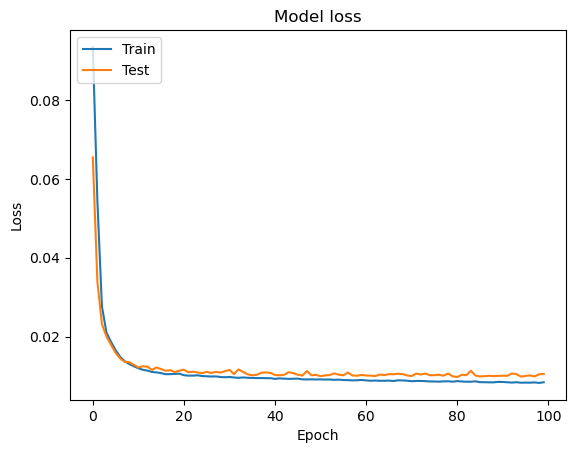

5/5 [==============================] - 0s 3ms/step
Train RMSE: 27.300489368542486
Test RMSE: 29.752628217048805


In [5]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the number of time steps
n_steps = 3
n_features = data.shape[1]

# Split the data into input features and target variable
X, y = [], []
for i in range(len(scaled_data) - n_steps):
    X.append(scaled_data[i:i + n_steps, :])
    y.append(scaled_data[i + n_steps, :])
X, y = np.array(X), np.array(y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')

# Fit the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform(y_train)
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform(y_test)

# Calculate RMSE for train and test sets
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = np.sqrt(mean_squared_error(y_test, test_predict))
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)


In [6]:
# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Define the number of time steps
n_steps = 3
n_features = data.shape[1]

# Prepare input data for the last n_steps days
last_days = scaled_data[-n_steps:, :].reshape(1, n_steps, n_features)

# Make prediction for the next day
next_day_prediction = model.predict(last_days)

# Inverse transform the prediction to get the actual values
next_day_prediction = scaler.inverse_transform(next_day_prediction)

# Create a DataFrame to display the predicted values with their labels
predicted_df = pd.DataFrame(next_day_prediction, columns=data.columns)

# Display the predicted values with their labels
print("Predicted values for the next day:")
print(predicted_df)

1/1 [==============================] - 0s 33ms/step
Predicted values for the next day:
       PM2.5        PM10        NO        NO2        NOx        NH3       SO2  \
0  83.222534  186.459183  8.530882  30.576258  25.391788  44.140347  8.138685   

         CO      Ozone  
0  0.749661  28.899475  


In [7]:
# Using the model to predict the next 7 days
n_days = 7
last_days = scaled_data[-n_steps:, :].reshape(1, n_steps, n_features)
next_days_predictions = []
for i in range(n_days):
    next_day_prediction = model.predict(last_days)
    next_days_predictions.append(next_day_prediction)
    last_days = np.append(last_days[:, 1:, :], next_day_prediction.reshape(1, 1, n_features), axis=1)

# Inverse transform the predictions to get the actual values
next_days_predictions = scaler.inverse_transform(np.array(next_days_predictions).reshape(n_days, n_features))

# Create a DataFrame to display the predicted values with their labels
predicted_df = pd.DataFrame(next_days_predictions, columns=data.columns)

# Display the predicted values with their labels
print("Predicted values for the next 7 days:")

print(predicted_df)

1/1 [==============================] - 0s 24ms/step
Predicted values for the next 7 days:
       PM2.5        PM10         NO        NO2        NOx        NH3  \
0  83.222534  186.459183   8.530882  30.576258  25.391788  44.140347   
1  85.028748  185.571106  10.845497  31.914513  25.678110  43.427368   
2  90.153526  187.985703   9.644008  31.301577  26.159737  42.924988   
3  89.487892  183.890167   9.633723  30.581438  26.307297  42.189140   
4  88.795448  181.622665   9.687511  30.545408  26.210032  41.451221   
5  88.729622  179.902634   9.819077  30.421366  26.276184  40.962242   
6  87.907318  177.597183   9.996436  30.369780  26.417320  40.504566   

        SO2        CO      Ozone  
0  8.138685  0.749661  28.899475  
1  7.838133  0.754936  29.864429  
2  7.911822  0.822349  29.405031  
3  7.725802  0.855771  29.648474  
4  7.584772  0.879599  29.484381  
5  7.478609  0.911133  29.127211  
6  7.359401  0.933259  28.826962  
